### MinMaxScaler works best for this data set. RobustScaler leads to logically nonsensical results and StandardScaler assigns undue importance to insignificant features by getting rid of the important long right tails in the data.

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
df = pd.read_csv('./data/marketing_data.csv')
#Preprocess Income
df['Income']=df[' Income ']
df['Income']=df.Income.str.replace('$','')
df['Income']=df.Income.str.replace(',','')#.astype("Int64")
df['Income']=df.Income.astype("float")
df['Income'].fillna((df['Income'].median()), inplace=True)
df = df.drop([' Income '], axis=1)
df.drop(df.index[[527,513,827,2233]],inplace=True) #drop income outlier 527 and age outliers
df['LogIncome'] = np.log1p(df['Income'])

#Preprocess Education
df.loc[df['Education']=='2n Cycle','Education']='Master'
df.loc[df['Education']=='Graduation','Education']='Bachelor'

#Preprocess Children
df['NumChildren']  = df['Kidhome']+df['Teenhome']
df['HasChildren']=np.where(df.NumChildren> 0, 1, 0)

#Preprocess Marital Status
df['HasPartner']=np.where(((df.Marital_Status== 'Married')|(df.Marital_Status== 'Together')), 1, 0)

#Preprocess Date and Make Age
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['age'] = 2014 - df['Year_Birth']

#Make total spending, num promotions, and num orders accepted columns
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] +\
        +df['MntSweetProducts'] + df['MntGoldProds']
df['AcceptedCmpTot']=df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+\
       + df['AcceptedCmp5']
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']+df['NumCatalogPurchases']+\
    df['NumStorePurchases']+df['NumWebVisitsMonth']

# Make a column for spending normalized by length customer -> Consider doing this for other amounts as well
latest_date=(df["Dt_Customer"] + pd.to_timedelta(df['Recency'],'d')).max()
df['Len_Customer']=latest_date - df["Dt_Customer"]
df['Len_Customer']=df['Len_Customer'] / pd.to_timedelta(1, unit='D') #Convert to float
df['MntSpentNorm']=df['MntTotal']/df['Len_Customer']

In [21]:
df[df.age>100]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm


In [22]:
df[df.Income>300000]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm


In [23]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm'],
      dtype='object')

# Description of Customer Characteristics and Findings (Post)
- Cluster 0:Highish median income (.5 std to the right)
- Cluster 1: High median income (1 std to the right). Average age (about45). Likely to have no children. 
- Cluster 2: Lower than average median income (1 std to the left). Youngest cluster (median age of about 40 vs. 45 for all)
- Cluster 3: Lower than average median income (.5 std to the left)
- Cluster 4: Lower than average median income (.5 std to the left)
- Cluster 5: High median income (1 std to the right). Average age (about 45). Likely to have no children. (The Strivers)

- Cluster 5 is higher educated than Cluster 1 (more PhD's and everyone in Cluster 5 has graduated from college)
- Add married vs nonmarried
- Spyder plot
- 

## Spending
- While Cluster 1 has spent the most overall, Cluster 2 spends almost twice as much when normalized by length as a customer. Cluster 0 are the third biggest spenders.

- Clusters 0, 1, 2 have been customers for about twice as long as Clusters 3, 4, 5 (600 vs 300)
- Clusters 0 and 2 spend the most on wines overall, but Cluster 5 spends the most when normalized. 
- For other categories, Cluster 1 spends the most overall followed by Clusters 5 and 0 spending. When normalized, Cluster 5 spends the most in every category.  

## Web, catalog
- Cluster 0 customers accept the most deals,followed by Cluster 2-4 customers.  Clusters 1 and 5 are not into deals.
- Cluster 0 is the most active on the web overall, followed by Clusters 1 and 5. When normalized, Cluster 5 are the most active on the web.
- Cluster 5 are the most active catalog users overall, followed by Clusters 1 and 5. When normalized, Cluster 5 are the most active catalog users.
- Both general and aggregated, Cluster 5 customers shop the most in store, followed by Clusters 0 and 1.
- Clusters 2-4 are the most active web users.  

## Campaigns
- Overall, promotions did not get a high response rate and noone has accepted all 5 campaigns.
- Date information on campaigns is not available, but based on logical analysis using customer join dates, it appears that campaigns were ongoing.
- Cluster 5 were particularly prone to accept campaigns 1 and 5, followed by Cluster 1 customers.
- Campaign 2 had a very low acceptance rate.
- Clusters 2 and 3 accepted campaign 3 at a higher rate than other customers.
- Cluster 0 customers accepted campaign 4 at a higher rate than other customers.
- Clusters 3 accepted campaign 5 at a higher rate than other customers.


In [24]:
cats = {'Education', 'Marital_Status', 
       'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain','Country','HasChildren','HasPartner',}
# for var in cats:
#     df[var] = df[var].astype('category').cat.codes


nums = (set(df.columns) -set(cats)) - {'ID','Dt_Customer','LogIncome','MntSpentNorm','MntTotal', 'AcceptedCmpTot','NumTotalPurchases','Year_Birth'} #drop some highly correlated transformed vars

#X = df.drop(list(nums),axis=1) #Dropping Dt_Customer since this is causing problems in RF
X = df[list(nums)] #Dropping Dt_Customer since this is causing problems in RF

In [25]:
pd.set_option('display.max_columns', 500)

In [26]:
X.head()

,NumWebPurchases,NumChildren,MntWines,Recency,MntSweetProducts,age,MntFruits,NumWebVisitsMonth,NumCatalogPurchases,MntGoldProds,MntMeatProducts,NumDealsPurchases,NumStorePurchases,MntFishProducts,Len_Customer,Income
0,4,0,189,0,189,44,104,1,4,218,379,1,6,111,110.0,84835.0
1,7,0,464,0,0,53,5,5,3,37,64,1,7,7,111.0,57091.0
2,3,1,134,0,2,56,11,2,2,30,59,1,5,15,144.0,67267.0
3,1,2,10,0,0,47,0,7,0,0,1,1,2,0,146.0,32474.0
4,3,1,6,0,0,25,16,7,1,34,24,2,2,11,179.0,21474.0


In [10]:
np.shape(X)

(2236, 16)

# Try different scalers to see effects on radar plot

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(X)

In [27]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_rescaled = scaler.fit_transform(X)

# IF DO PCA, UNCOMMENT THE CELL BELOW

In [28]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.95)
# pca.fit(data_rescaled)
# reduced = pca.transform(data_rescaled)
# print(np.shape(reduced))
# num_components = np.shape(reduced)[1]
# print(num_components)
# columns = ['col'+str(i) for i in range(1,num_components)]
# scaler = MinMaxScaler()
# data_rescaled = scaler.fit_transform(reduced)

# IF DO PCA, COMMENT OUT THE CELL BELOW

In [29]:
num_components=np.shape(X)[1]

Elbow Method:


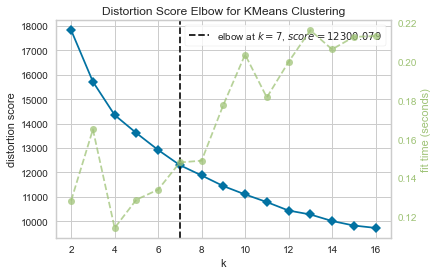

In [30]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=num_components, random_seed=42) #for the 20 numeric
Elbow_M.fit(data_rescaled) 
Elbow_M.show();

##### From a high level, our KMeans algorithm follows the below steps in order to find optimal cluster groups:

1. Select k as the number of groups to cluster for
2. Randomly pick k points in our data as centroid points
3. Assign each non-centroid point to its closest centroid
4. Recalculate centroid points by taking the average of all surrounding points assigned to that cluster
5. Repeat steps 3-4 until calculated centroid points do not move anymore. Done
- Source: https://philippeheitzmann.com/2022/01/implementing-kmeans-clustering/

In [31]:
n_clusters=7

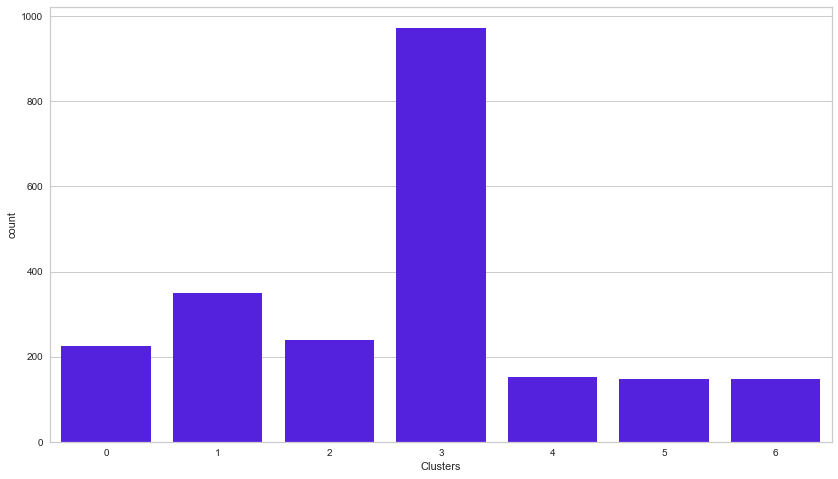

In [32]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Clusters'] = kmeans.fit_predict(data_rescaled)

data_rescaled = pd.DataFrame(data_rescaled, columns = nums)

data_rescaled['Clusters'] = df["Clusters"]

plt.figure(figsize=(14, 8))
sns.countplot(x='Clusters', data=df,hue=None,color='#4503fc',)
plt.show()

In [33]:
df.Clusters.value_counts()

3    973
1    350
2    239
0    226
4    153
6    148
5    147
Name: Clusters, dtype: int64

In [34]:
# df_reduced = nums
# cols_of_interest = list(df_reduced)
# cols_of_interest.append('Clusters')
# print(cols_of_interest)
#data_rescaled = pd.to
polars = data_rescaled.groupby('Clusters').mean().reset_index()
polars = pd.melt(polars, id_vars = ['Clusters'])
fig = px.line_polar(polars, r='value', theta = 'variable', color = 'Clusters', line_close = True, height = 800, width = 1400)
fig.show()

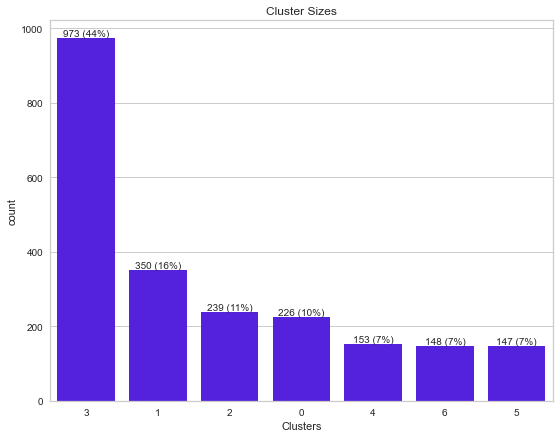

In [35]:
# Code hint from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
plt.figure(figsize=(9, 7))

ax = sns.countplot(x=df['Clusters'], data=df,hue=None,color='#4503fc',order=df['Clusters'].value_counts(ascending=False).index);
        
abs_values = df['Clusters'].value_counts(ascending=False)
rel_values = df['Clusters'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title("Cluster Sizes")

plt.savefig('./figures/clusters_sizes.png')


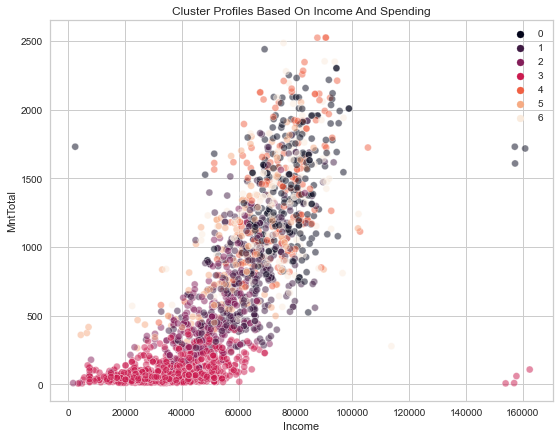

In [36]:
plt.figure(figsize=(9, 7))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntTotal"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster Profiles Based On Income And Spending")
plt.savefig('./figures/income_mnttotal_clusters.pdf')#, bbox_inches='tight')
plt.legend()
plt.show()

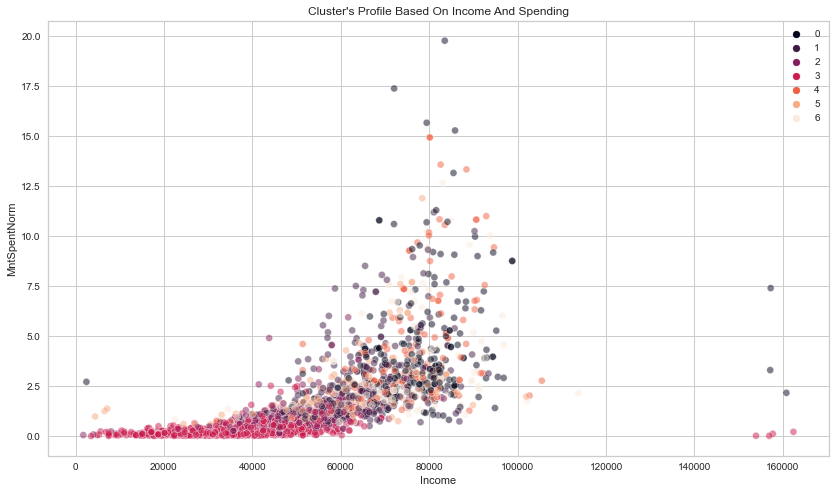

In [37]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntSpentNorm"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [38]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm', 'Clusters'],
      dtype='object')

In [39]:
# x =df["LogIncome"]
# y =df["AcceptedCmpTot"]
# z =df["MntSpentNorm"]
# #To plot
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(x,y,z, c="maroon", marker="o" )
# ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
# plt.show()

In [40]:
# x =df["LogIncome"]
# y =df["AcceptedCmpTot"]
# z =df["MntSpentNorm"]
# fig = plt.figure(figsize=(10,8))
# ax = plt.subplot(111, projection='3d', label="bla")
# ax.scatter(x, y, z, s=40, c=df["Clusters"], marker='o', cmap = 'PuRd' )
# ax.set_title("The Plot Of The Clusters")
# plt.show()

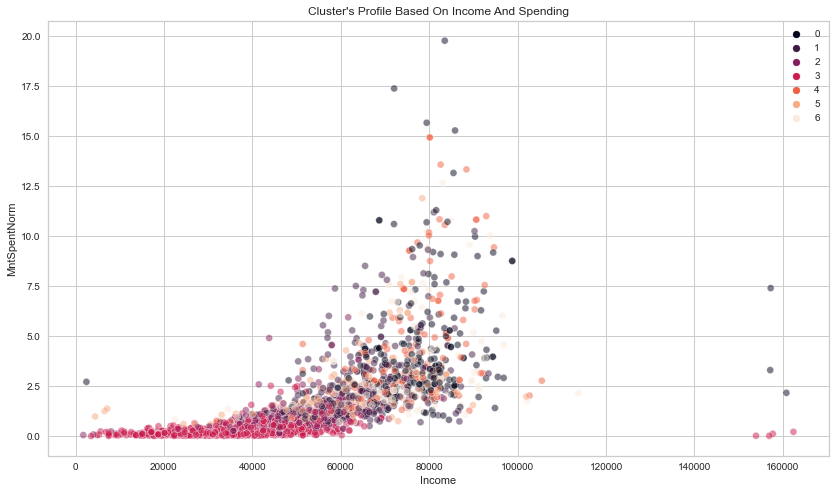

In [41]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntSpentNorm"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [42]:
df["Clusters"].value_counts()

3    973
1    350
2    239
0    226
4    153
6    148
5    147
Name: Clusters, dtype: int64

<AxesSubplot:>

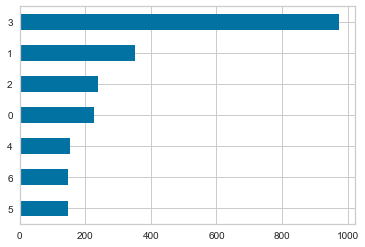

In [43]:
df.Clusters.value_counts().sort_values().plot(kind = 'barh')

In [44]:
groupsKmeans=df.groupby(['Clusters'])#.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

In [45]:
groupsKmeans.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                                Year_Birth  \
         count      sum  min    max         mean          std      count   
Clusters                                                                   
0          226  1220087    0  11056  5398.615044  3212.675856        226   
1          350  2029968    1  11176  5799.908571  3358.389296        350   
2          239  1277211    9  11171  5343.979079  3233.532469        239   
3          973  5430486   13  11191  5581.177801  3241.893869        973   
4          153   895920  202  11112  5855.686275  3200.322822        153   
5          147   830672   25  11101  5650.829932  3208.306696        147   
6          148   812679  123  10882  5491.074324  3150.219669        148   

                                                      Kidhome               \
              sum   min   max         mean        std   count  sum min max   
Clusters                                                                     
0          444501  1941  1995  1966.818584  13.510747     226    5   0   1   
1          687675  1943  1994  1964.785714  11.330782     350   37   0   2   
2          470076  1946  1991  1966.845188   9.637826     239  176   0   2   
3         1918200  1940  1996  1971.428571  10.984945     973  740   0   2   
4          301453  1943  1993  1970.281046  12.841881     153    5   0   1   
5          289102  1946  1992  1966.680272  11.551544     147   18   0   2   
6          291449  1945  1995  1969.250000  11.988586     148   12   0   1   

                             Teenhome                                   \
              mean       std    count  sum min max      mean       std   
Clusters                                                                 
0         0.022124  0.147413      226   26   0   2  0.115044  0.333392   
1         0.105714  0.325992      350  260   0   2  0.742857  0.526809   
2         0.736402  0.528170      239  222   0   2  0.928870  0.448109   
3         0.760534  0.504307      973  440   0   2  0.452210  0.526096   
4         0.032680  0.178381      153   36   0   2  0.235294  0.440763   
5         0.122449  0.349127      147   97   0   2  0.659864  0.529882   
6         0.081081  0.273886      148   52   0   2  0.351351  0.493011   

         Recency                                      MntWines              \
           count    sum min max       mean        std    count     sum min   
Clusters                                                                     
0            226  11686   0  99  51.707965  29.175844      226  144181   1   
1            350  16655   0  99  47.585714  28.385139      350  188173  34   
2            239  11787   0  98  49.317992  27.615444      239   70281   1   
3            973  47724   0  99  49.048304  29.239657      973   38853   0   
4            153   7013   0  98  45.836601  27.792809      153   81317  33   
5            147   7373   0  99  50.156463  29.940054      147   77772   7   
6            148   7586   0  99  51.256757  30.387323      148   79452   5   

                                       MntFruits                              \
           max        mean         std     count    sum min  max        mean   
Clusters                                                                       
0         1493  637.969027  327.378916       226   9547   0  127   42.243363   
1         1478  537.637143  332.408950       350   8823   0  123   25.208571   
2         1099  294.062762  207.961535       239   2415   0   89   10.104603   
3          408   39.931141   55.253777       973   4152   0   51    4.267215   
4         1259  531.483660  279.818435       153  21270  83  199  139.019608   
5         1486  529.061224  341.436675       147   4508   0  126   30.666667   
6         1394  536.837838  294.848538       148   8038   0  144   54.310811   

                    MntMeatProducts                                 \
                std           count     sum  min   max        mean   
Cluster

In [46]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm,Clusters
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,51952.614043,10.753375,0.950805,0.715116,0.644902,45.101968,605.986583,0.297853,20.191413,450.773256,1.653348,2.675313
std,3244.826887,11.703281,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,21411.466851,0.500319,0.752204,0.451460,0.478650,11.703281,601.865156,0.678737,7.291811,202.181561,2.173188,1.570175
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,7.456455,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,97.000000,0.009276,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35502.500000,10.477386,0.000000,0.000000,0.000000,37.000000,69.000000,0.000000,14.000000,277.750000,0.202060,1.000000
50%,5454.500000,1970.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000,10.847053,1.000000,1.000000,1.000000,44.000000,396.500000,0.000000,19.000000,453.000000,0.866443,3.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68275.750000,11.131325,1.000000,1.000000,1.000000,55.000000,1045.500000,0.000000,25.000000,626.000000,2.270000,3.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,162397.000000,11.997805,3.000000,1.000000,1.000000,74.000000,2525.000000,4.000000,46.000000,796.000000,19.788991,6.000000


[322723.0, 285447.0, 110586.0, 85862.0, 214711.0, 142547.0, 193110.0]
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']


<AxesSubplot:>

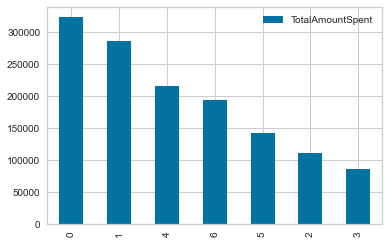

In [47]:
cluster_mnt_totals = [[]]*n_clusters

for i in range(n_clusters):
    cluster_i=df[df["Clusters"]==i]
    cluster_mnt_totals[i] = cluster_i.MntTotal.mean()*len(cluster_i)

print(cluster_mnt_totals) 

columns = ['cluster'+str(i) for i in range(n_clusters)]
print(columns)

df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:'TotalAmountSpent'},axis=1)

df_cluster_mnt_totals.sort_values('TotalAmountSpent', ascending=False).plot.bar()

[939.0195976012919, 829.2793787281623, 234.37971477241703, 270.2670049190125, 623.8658800338148, 320.48354623032037, 479.5908615891207]
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']


<AxesSubplot:>

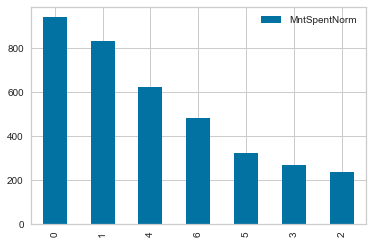

In [48]:
cluster_mnt_totals = [[]]*n_clusters

for i in range(n_clusters):
    cluster_i=df[df["Clusters"]==i]
    cluster_mnt_totals[i] = cluster_i.MntSpentNorm.mean()*len(cluster_i)

print(cluster_mnt_totals) 

columns = ['cluster'+str(i) for i in range(n_clusters)]
print(columns)

df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:'MntSpentNorm'},axis=1)

df_cluster_mnt_totals.sort_values('MntSpentNorm', ascending=False).plot.bar()

<!-- # Description of Customer Behavior
- Clusters 2 and 4 are big clusters that spend little
- Clusters 2 and 4  are usually educated, relatively recent customers, but are much more likely to have children than Clusters 1 and 3. Perhaps this store focuses on high-end more expensive products (Whole Foods at Monterey?) and people with children are finding it harder to afford shopping there, on average.  Cluster 5 customers have about just as likely to have children as Clusters 2 and 4, yet have a higher income.  
- To confirm these findings, Clusters 2, 4, and 5 are making the most deal purchases, especially when these are normalized by length someone spend as a customer.
 -->

In [49]:
#palette=sns.color_palette("rocket")
palette=sns.color_palette("Set2")

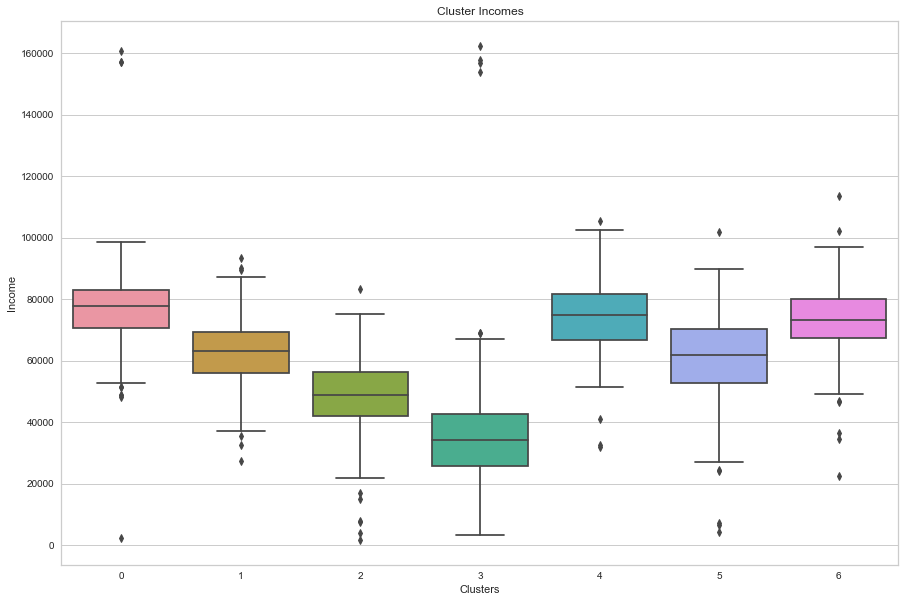

In [50]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="Income",
            data=df)

plot.set_title("Cluster Incomes")
plt.savefig('./figures/income_clusters_box.png')
plt.show()

### Clusters 1 and 3 are the high income clusters

In [51]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm,Clusters
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,51952.614043,10.753375,0.950805,0.715116,0.644902,45.101968,605.986583,0.297853,20.191413,450.773256,1.653348,2.675313
std,3244.826887,11.703281,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,21411.466851,0.500319,0.752204,0.451460,0.478650,11.703281,601.865156,0.678737,7.291811,202.181561,2.173188,1.570175
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,7.456455,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,97.000000,0.009276,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35502.500000,10.477386,0.000000,0.000000,0.000000,37.000000,69.000000,0.000000,14.000000,277.750000,0.202060,1.000000
50%,5454.500000,1970.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000,10.847053,1.000000,1.000000,1.000000,44.000000,396.500000,0.000000,19.000000,453.000000,0.866443,3.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68275.750000,11.131325,1.000000,1.000000,1.000000,55.000000,1045.500000,0.000000,25.000000,626.000000,2.270000,3.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,162397.000000,11.997805,3.000000,1.000000,1.000000,74.000000,2525.000000,4.000000,46.000000,796.000000,19.788991,6.000000


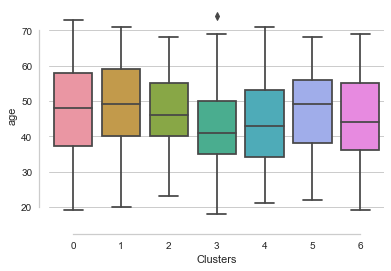

In [52]:
sns.boxplot(x="Clusters", y="age",
            data=df)
sns.despine(offset=10, trim=True)

### Age is similar across clusters, with median age in the 40s

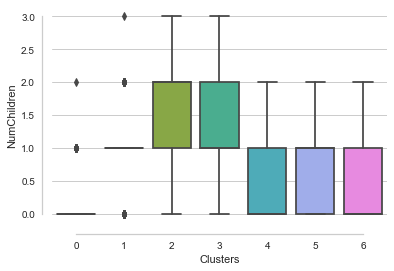

In [53]:
sns.boxplot(x="Clusters", y="NumChildren",
            data=df)
sns.despine(offset=10, trim=True)

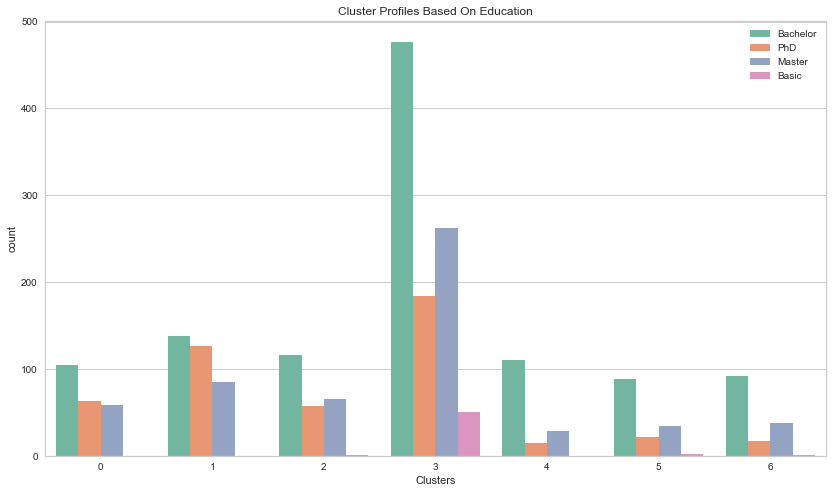

In [56]:
palette=sns.color_palette("Set2")
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["Clusters"],hue=df["Education"], palette = palette)

plot.set_title("Cluster Profiles Based On Education")
plt.legend()
plt.show()

In [57]:
# plt.figure(figsize=(14,8))

# x,y = 'Clusters', 'Education'

# df1 = df.groupby(x)[y].value_counts(normalize=True)
# df1 = df1.mul(100)
# df1 = df1.rename('Percent').reset_index()

# g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette)
# g.ax.set_ylim(0,60)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)
#     #plt.figure(figsize=(14,8))
#     #plt.figure(figsize=(14,8))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


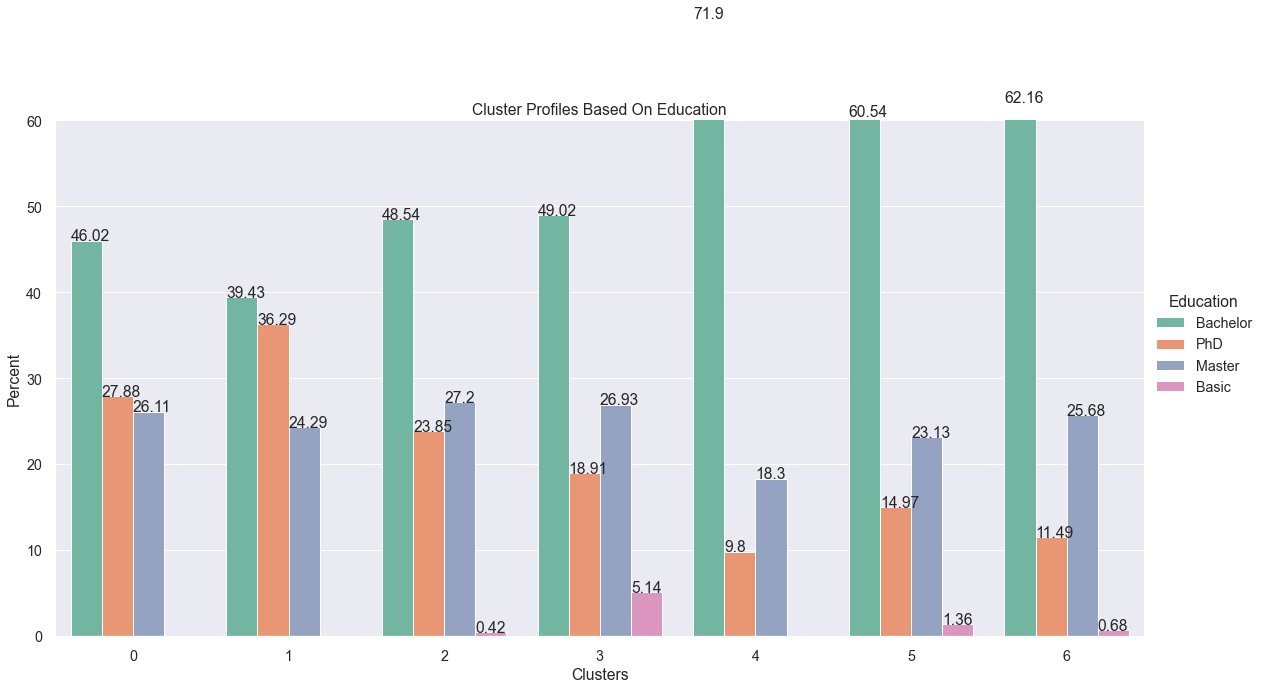

In [58]:
#plt.figure(figsize=(14,8)) #does not work, use height and aspect
palette=sns.color_palette("Set2")
sns.set(font_scale = 1.3)

x,y = 'Clusters', 'Education'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g.figure(figsize=(14,8))

g.ax.set_ylim(0,60)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    #plt.figure(figsize=(14,8))
    #plt.figure(figsize=(14,8))
plt.title("Cluster Profiles Based On Education")
plt.savefig('./figures/edu_clusters.png')

In [59]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm', 'Clusters'],
      dtype='object')

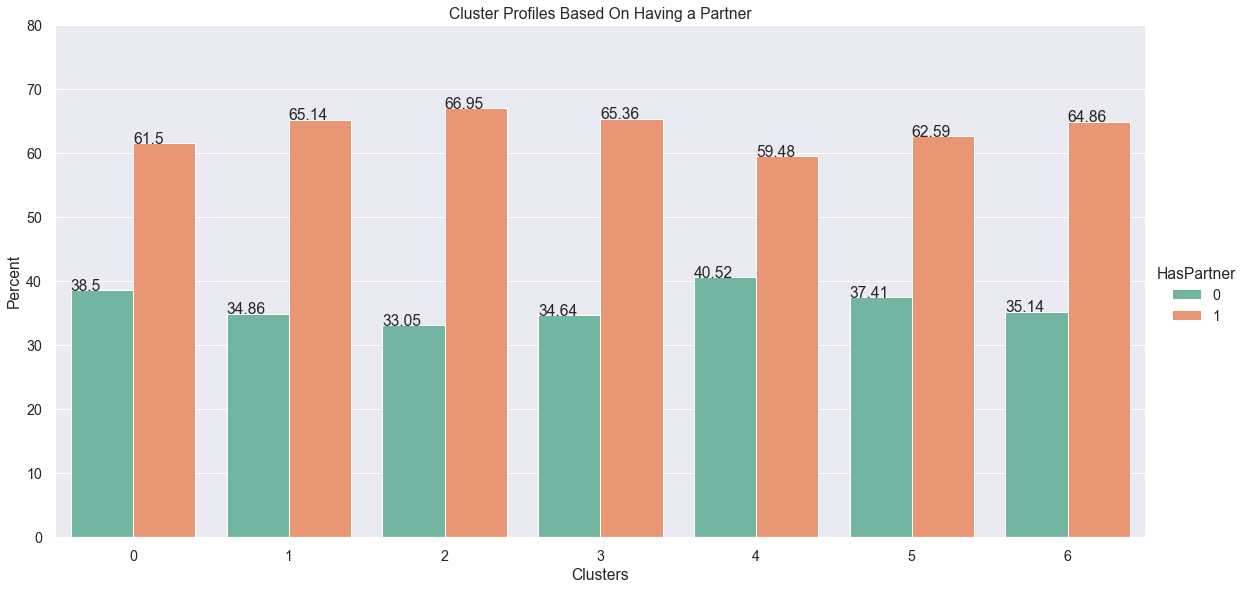

In [60]:
#plt.figure(figsize=(14,8)) #does not work, use height and aspect
palette=sns.color_palette("Set2")
sns.set(font_scale = 1.3)

x,y = 'Clusters', 'HasPartner'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g.figure(figsize=(14,8))

g.ax.set_ylim(0,80)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    #plt.figure(figsize=(14,8))
    #plt.figure(figsize=(14,8))
plt.title("Cluster Profiles Based On Having a Partner")
plt.savefig('./figures/partner_clusters.png')

In [61]:
groupsKmeansEdu=df.groupby(['Clusters','Education']).agg(['count'])

In [62]:
groupsKmeansEdu

ID Year_Birth Marital_Status Kidhome Teenhome  \
                   count      count          count   count    count   
Clusters Education                                                    
0        Bachelor    104        104            104     104      104   
         Master       59         59             59      59       59   
         PhD          63         63             63      63       63   
1        Bachelor    138        138            138     138      138   
         Master       85         85             85      85       85   
         PhD         127        127            127     127      127   
2        Bachelor    116        116            116     116      116   
         Basic         1          1              1       1        1   
         Master       65         65             65      65       65   
         PhD          57         57             57      57       57   
3        Bachelor    477        477            477     477      477   
         Basic        50         50             50      50       50   
         Master      262        262            262     262      262   
         PhD         184        184            184     184      184   
4        Bachelor    110        110            110     110      110   
         Master       28         28             28      28       28   
         PhD          15         15             15      15       15   
5        Bachelor     89         89             89      89       89   
         Basic         2          2              2       2        2   
         Master       34         34             34      34       34   
         PhD          22         22             22      22       22   
6        Bachelor     92         92             92      92       92   
         Basic         1          1              1       1        1   
         Master       38         38             38      38       38   
         PhD          17         17             17      17       17   

                   Dt_Customer Recency MntWines MntFruits MntMeatProducts  \
                         count   count    count     count           count   
Clusters Education                                                          
0        Bachelor          104     104      104       104             104   
         Master             59      59       59        59              59   
         PhD                63      63       63        63              63   
1        Bachelor          138     138      138       138             138   
         Master             85      85       85        85              85   
         PhD               127     127      127       127             127   
2        Bachelor          116     116      116       116             116   
         Basic               1       1        1         1               1   
         Master             65      65       65        65              65   
         PhD                57      57       57        57              57   
3        Bachelor          477     477      477       477             477   
         Basic              50      50       50        50              50   
         Master            262     262      262       262             262   
         PhD               184     184      184       184             184   
4        Bachelor          110     110      110       110             110   
         Master             28      28       28        28              28   
         PhD                15      15       15        15              15   
5        Bachelor           89      89       89        89              89   
         Basic               2       2        2         2               2   
         Master             34      34       34        34              34   
         PhD                22      22       22        22              22   
6        Bachelor           92      92       92        92              92   
         Basic               1       1        1         1               1   
         Master             38 

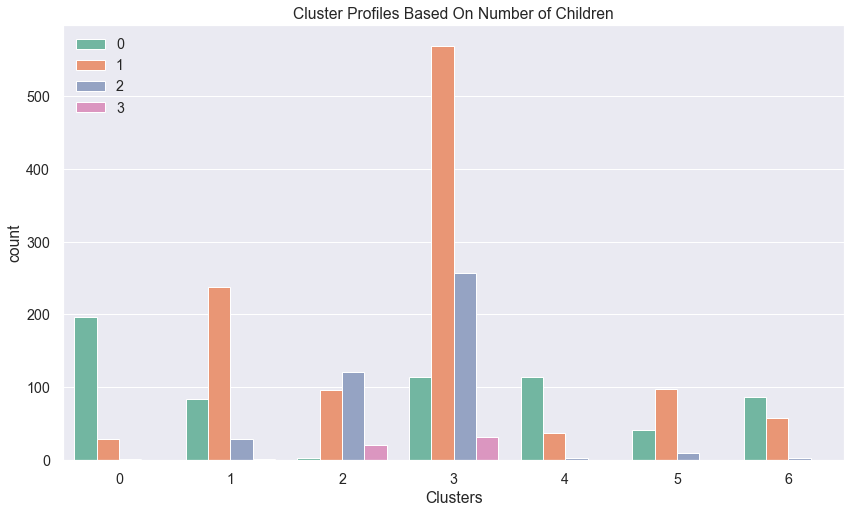

In [63]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("Set2")

#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["Clusters"],hue=df["NumChildren"], palette = palette)

plot.set_title("Cluster Profiles Based On Number of Children")
plt.savefig('./figures/child_clusters.png')
plt.legend()
plt.show()

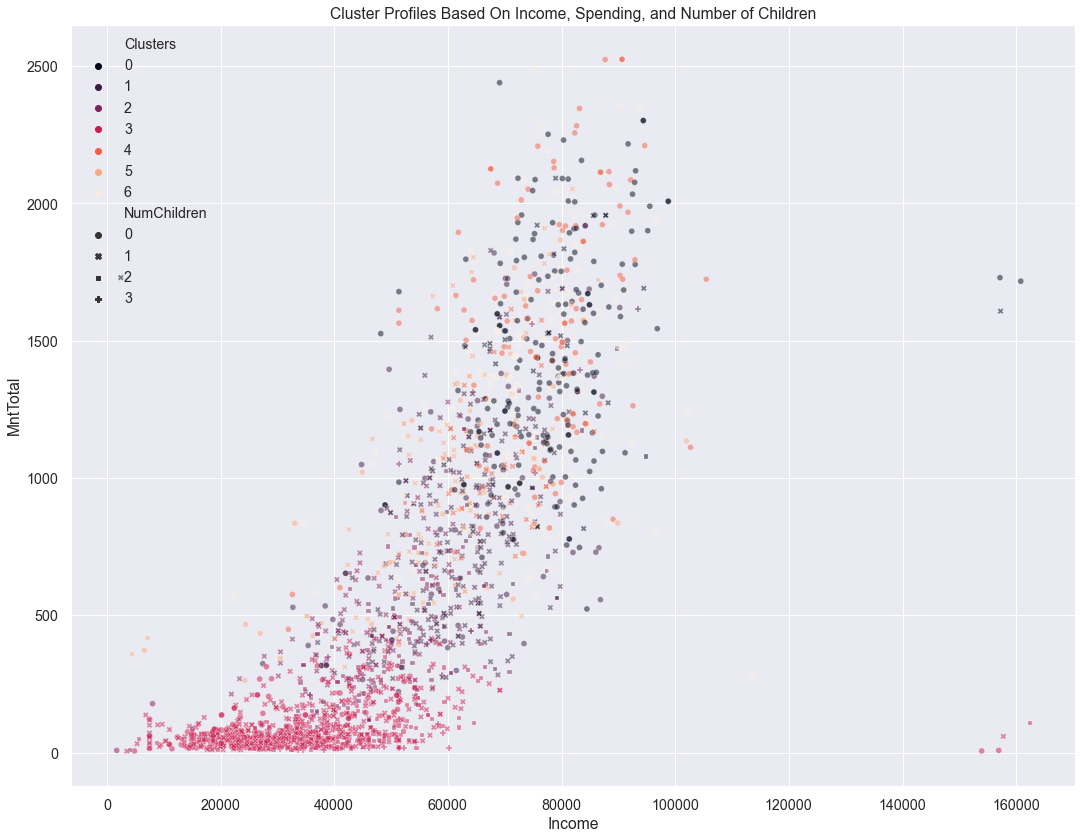

In [64]:
plt.figure(figsize=(18, 14))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntTotal"],hue=df["Clusters"],alpha=.5,palette=palette,style=df['NumChildren'])

plot.set_title("Cluster Profiles Based On Income, Spending, and Number of Children")
plt.savefig('./figures/income_mnttotal_child_clusters.pdf')#, bbox_inches='tight')
plt.legend()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


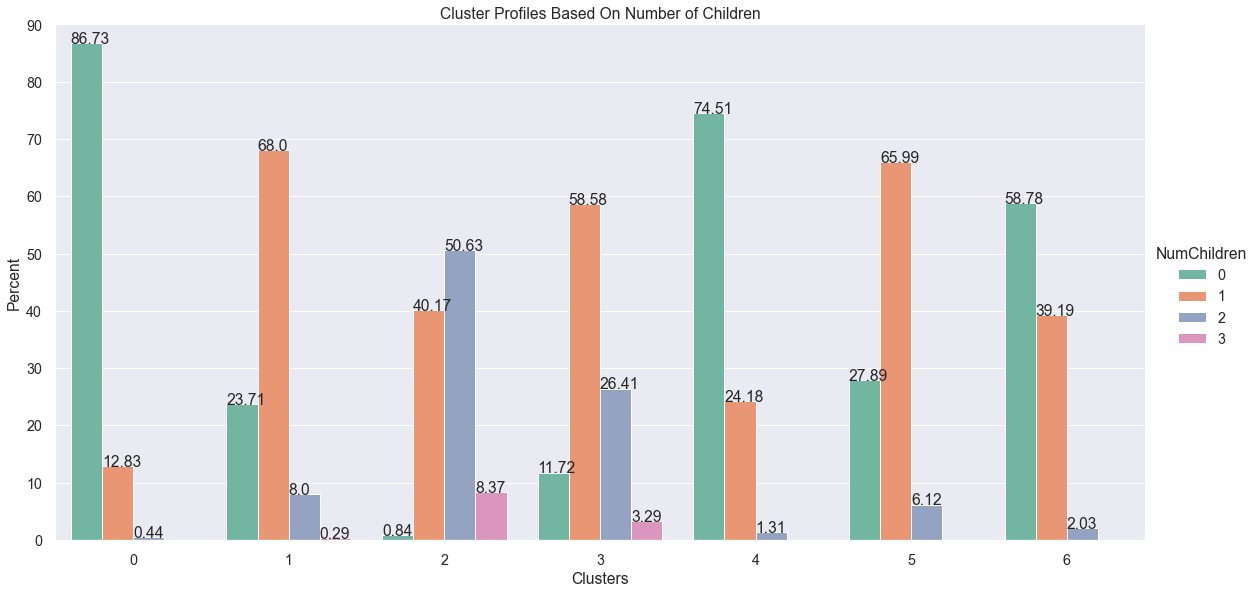

In [65]:
#plt.figure(figsize=(14,8)) #does not work, use height and aspect
sns.set(font_scale = 1.3)
palette=sns.color_palette("Set2")

x,y = 'Clusters', 'NumChildren'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g = sns.countplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#plot = sns.countplot(x=df["Clusters"],hue=df["NumChildren"], palette = palette)


#g.figure(figsize=(14,8))

g.ax.set_ylim(0,90)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    #plt.figure(figsize=(14,8))
    #plt.figure(figsize=(14,8))
plt.title('Cluster Profiles Based On Number of Children')

plt.savefig('./figures/child_clusters.png')

In [66]:
### Most customers in Clusters 1 and 3 don't have children, but Cluster 1 customers are likelier to have at least one child

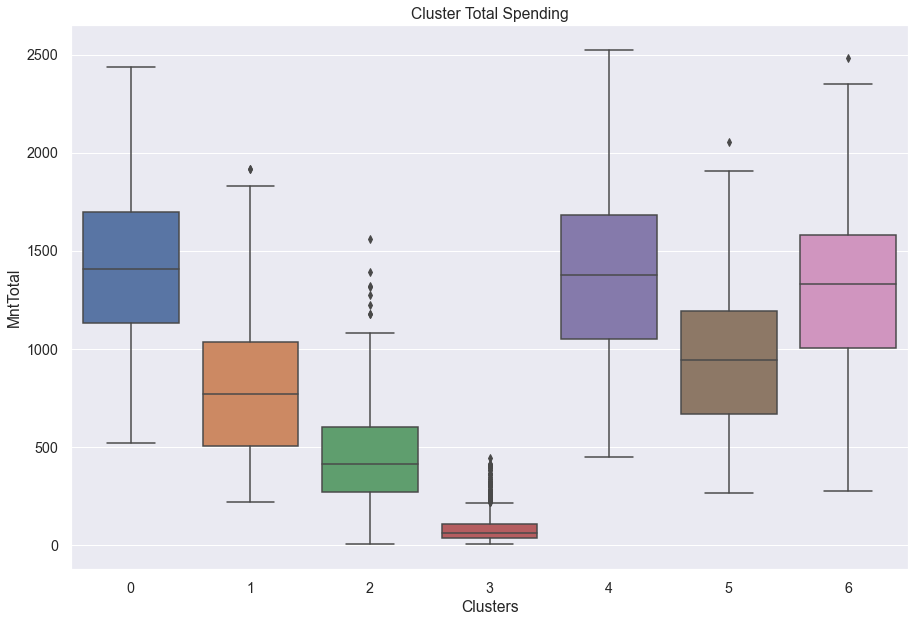

In [67]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="MntTotal",
            data=df)

plot.set_title("Cluster Total Spending")
plt.savefig('./figures/mnttotal_clusters_box.png')
plt.show()

In [68]:
### Cluster 3 customers have the highest median overall spending, followed by Cluster 1 and 5 customers

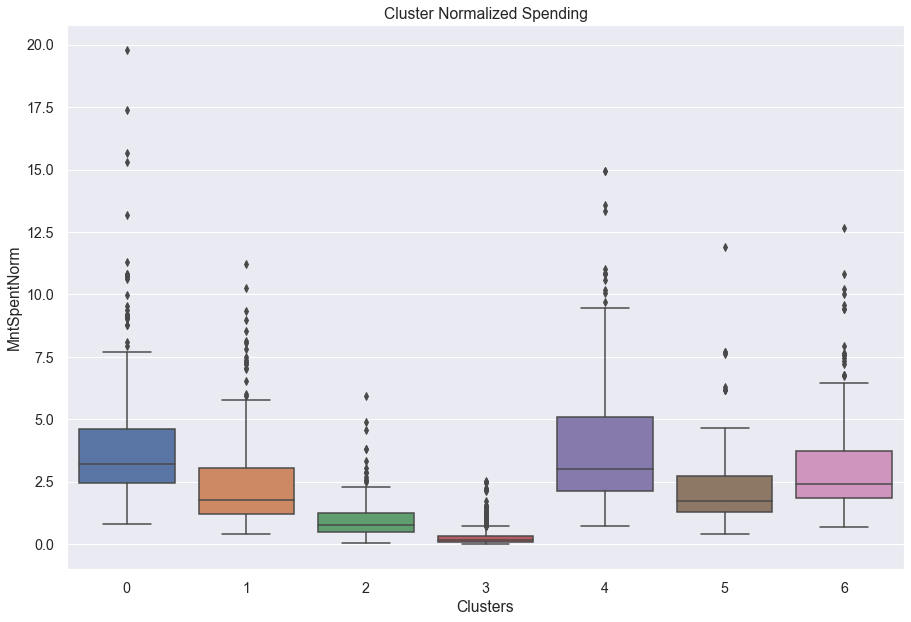

In [69]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="MntSpentNorm",
            data=df)

plot.set_title("Cluster Normalized Spending")
plt.savefig('./figures/mnt_norm_clusters_box.png')
plt.show()

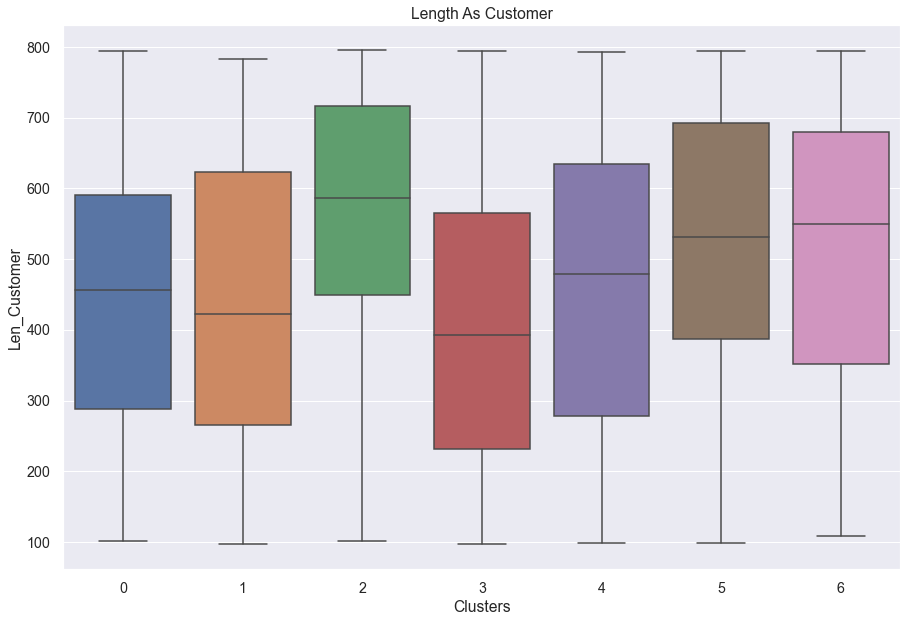

In [70]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="Len_Customer",
            data=df)

plot.set_title("Length As Customer")
plt.savefig('./figures/length_customer_box.png')
plt.show()


In [71]:
### Compared to Cluster 1, Cluster 3 have been with the comapany much longer.  However, Cluster 1 has been with the company even longer and Cluster 5 has been with the company a long time as well.

In [72]:
### As seen below, if we normalize by length spent as customer, Cluster 1 spends the most in every category

In [73]:
df['MntWinesNorm']=df['MntWines']/df['Len_Customer']

df['MntFruitsNorm']=df['MntFruits']/df['Len_Customer']

df['MntMeatProductsNorm']=df['MntMeatProducts']/df['Len_Customer']

df['MntFishProductsNorm']=df['MntFishProducts']/df['Len_Customer']

df['MntSweetProductsNorm']=df['MntSweetProducts']/df['Len_Customer']

df['MntGoldProdsNorm']=df['MntGoldProds']/df['Len_Customer']

df['NumDealsPurchasesNorm']=df['NumDealsPurchases']/df['Len_Customer']

df['NumWebPurchasesNorm']=df['NumWebPurchases']/df['Len_Customer']

df['NumStorePurchasesNorm']=df['NumStorePurchases']/df['Len_Customer']

df['NumWebVisitsMonthNorm']=df['NumWebVisitsMonth']/df['Len_Customer']

df['NumCatalogPurchasesNorm']=df['NumCatalogPurchases']/df['Len_Customer']

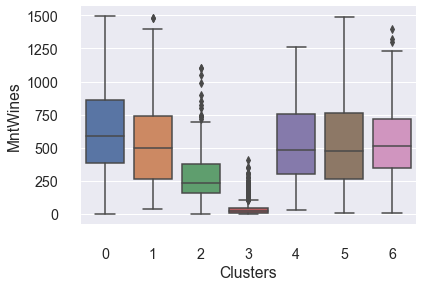

In [74]:
sns.boxplot(x="Clusters", y="MntWines",
            data=df)
sns.despine(offset=10, trim=True)

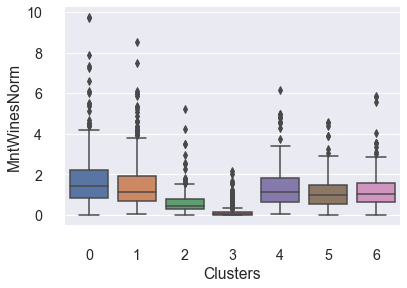

In [75]:
sns.boxplot(x="Clusters", y="MntWinesNorm",
            data=df)
sns.despine(offset=10, trim=True)

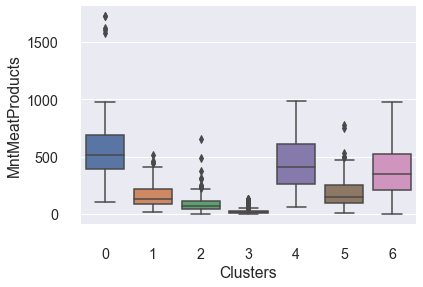

In [76]:
sns.boxplot(x="Clusters", y="MntMeatProducts",
            data=df)
sns.despine(offset=10, trim=True)

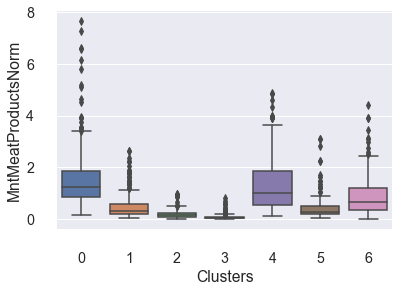

In [77]:
sns.boxplot(x="Clusters", y="MntMeatProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

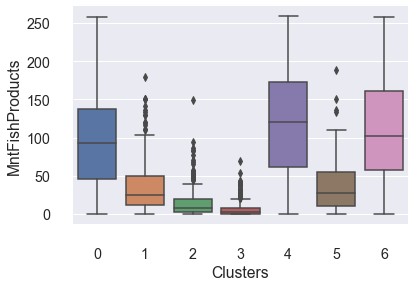

In [78]:
sns.boxplot(x="Clusters", y="MntFishProducts",
            data=df)
sns.despine(offset=10, trim=True)

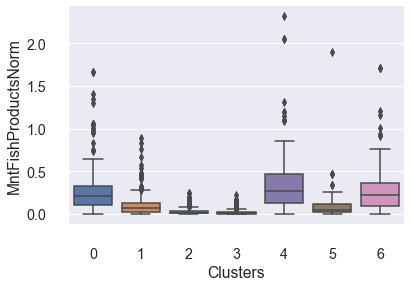

In [79]:
sns.boxplot(x="Clusters", y="MntFishProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

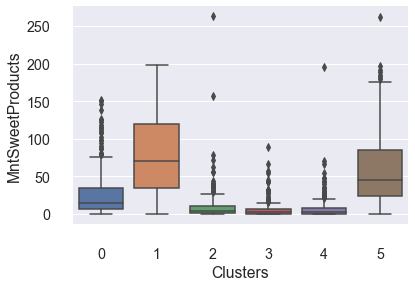

In [60]:
sns.boxplot(x="Clusters", y="MntSweetProducts",
            data=df)
sns.despine(offset=10, trim=True)

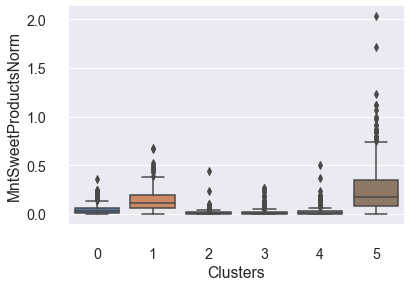

In [61]:
sns.boxplot(x="Clusters", y="MntSweetProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

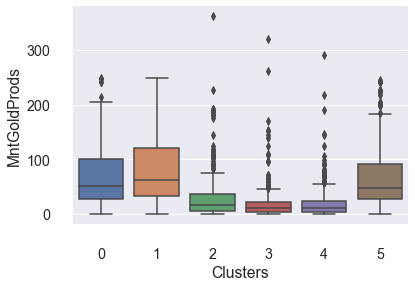

In [62]:
sns.boxplot(x="Clusters", y="MntGoldProds",
            data=df)
sns.despine(offset=10, trim=True)

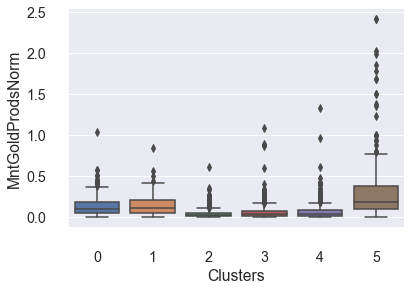

In [63]:
sns.boxplot(x="Clusters", y="MntGoldProdsNorm",
            data=df)
sns.despine(offset=10, trim=True)

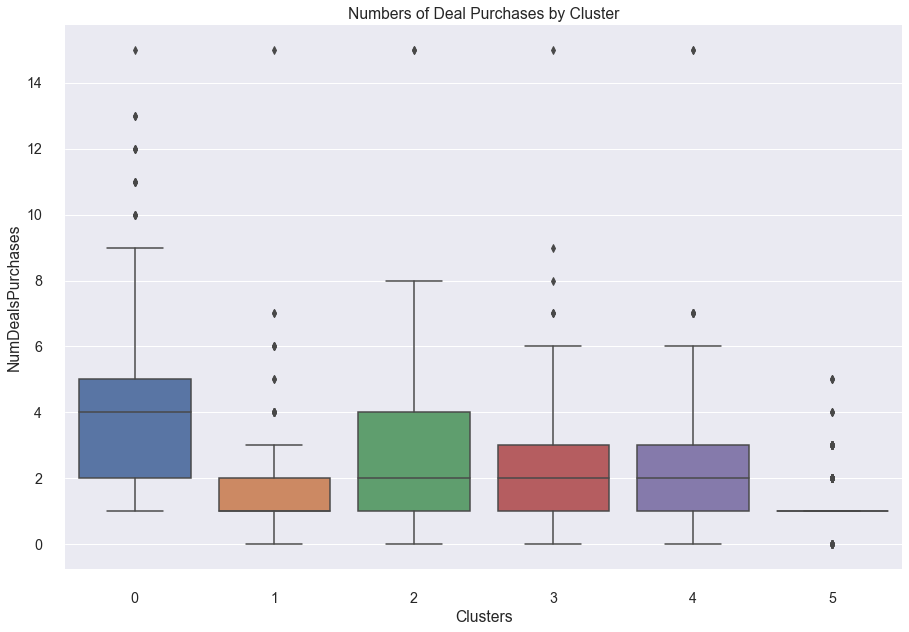

In [67]:
plt.figure(figsize=(15, 10))
plot=sns.boxplot(x="Clusters", y="NumDealsPurchases",
            data=df)
sns.despine(offset=10, trim=True)
plot.set_title("Numbers of Deal Purchases by Cluster")

plt.savefig('./figures/num_deals.png')

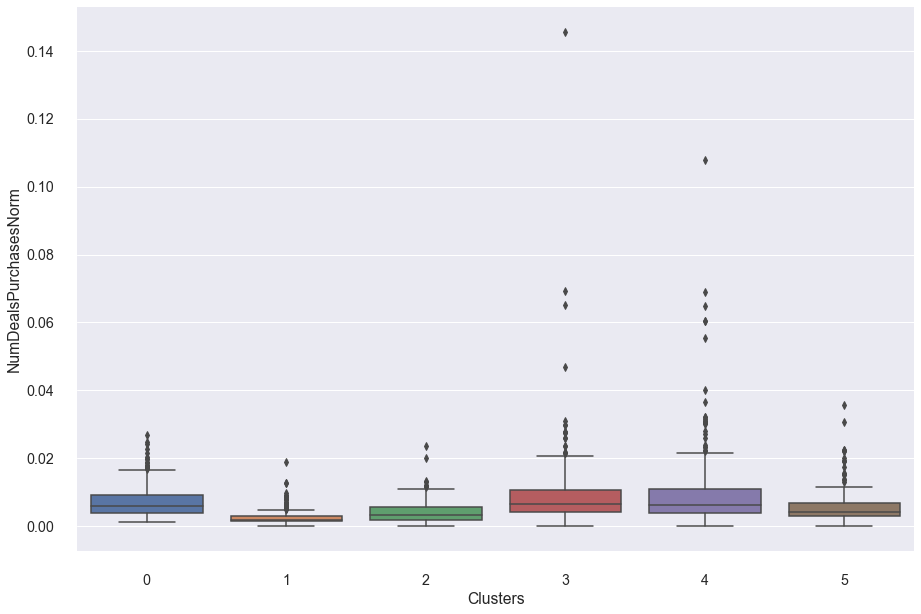

In [103]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Clusters", y="NumDealsPurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)
plot.set_title("Numbers of Deal Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_deals_norm.png')

In [55]:
### Clusters 1 and 3 rarely go for deal purchases compared to Cluster 5, for example.  Cluster 5 customers are much more likely to have at least one child than clusters 1 and 3.  

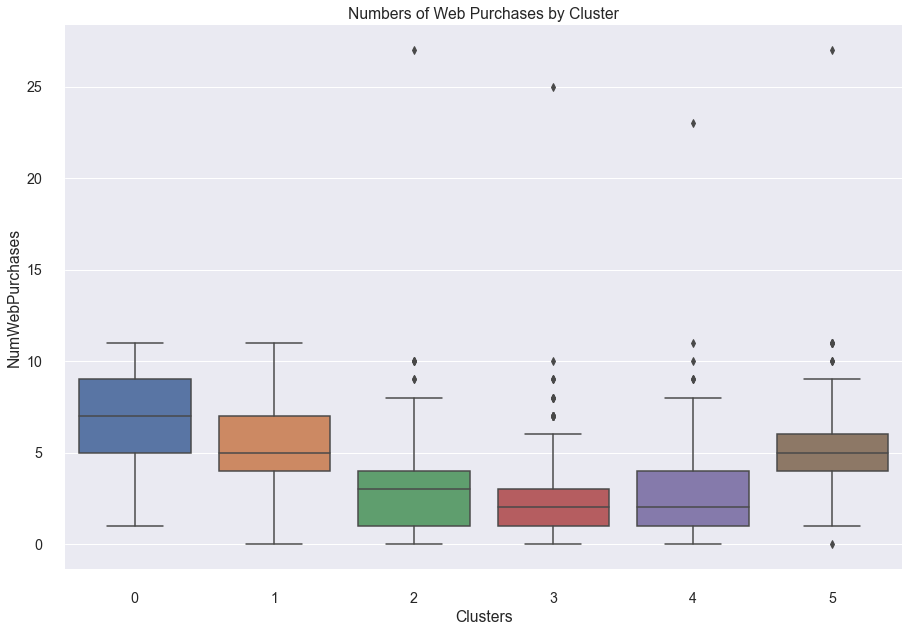

In [110]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Clusters", y="NumWebPurchases",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Web Purchases by Cluster")

plt.savefig('./figures/num_web.png')

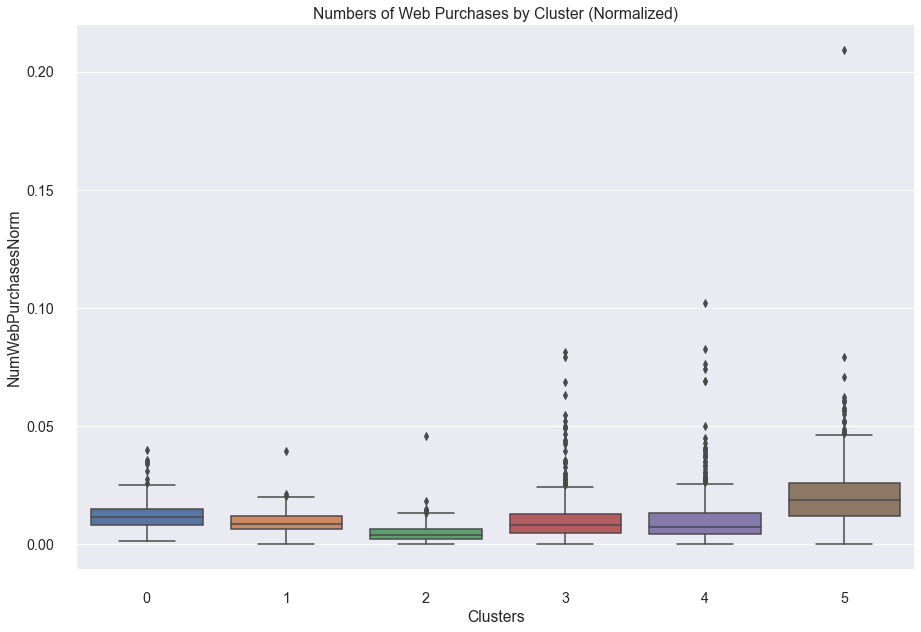

In [109]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Clusters", y="NumWebPurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Web Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_web_norm.png')

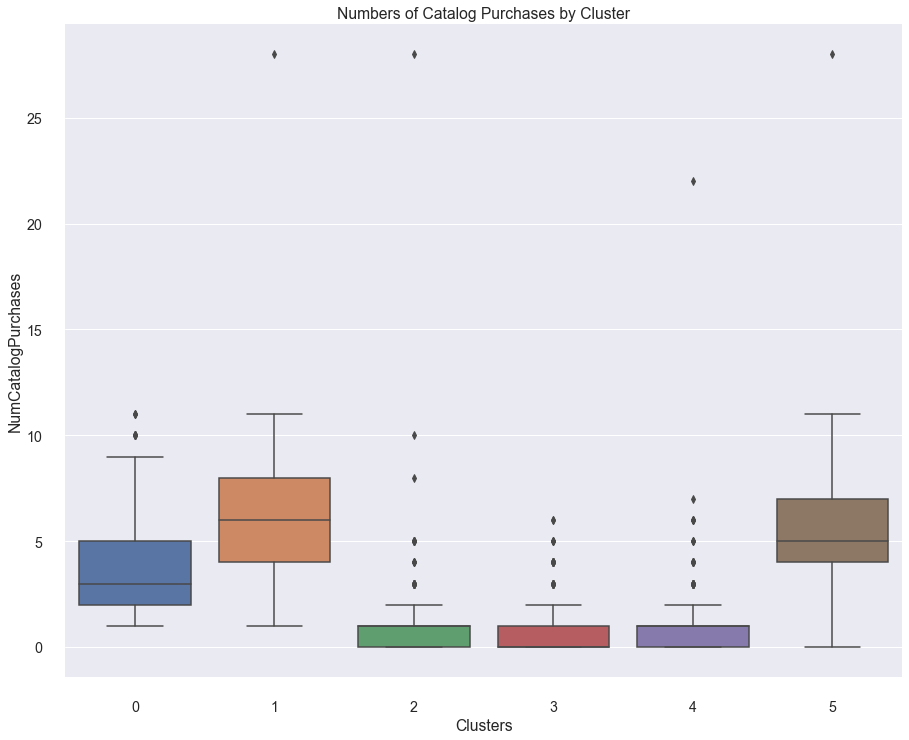

In [111]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumCatalogPurchases",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Catalog Purchases by Cluster")

plt.savefig('./figures/num_catalog.png')

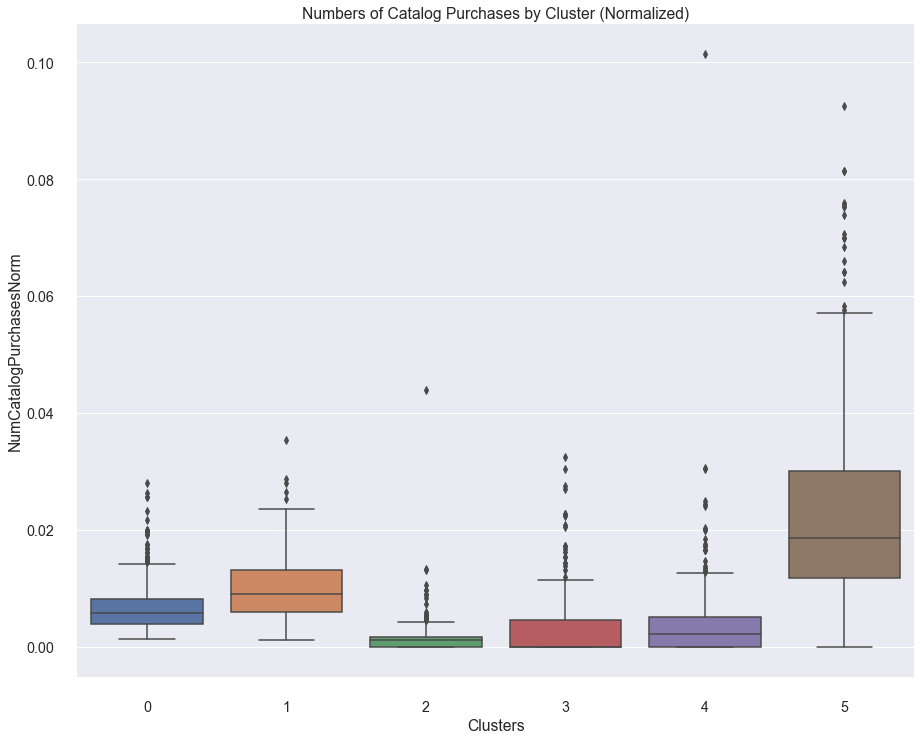

In [113]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumCatalogPurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Catalog Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_catalog_norm.png')

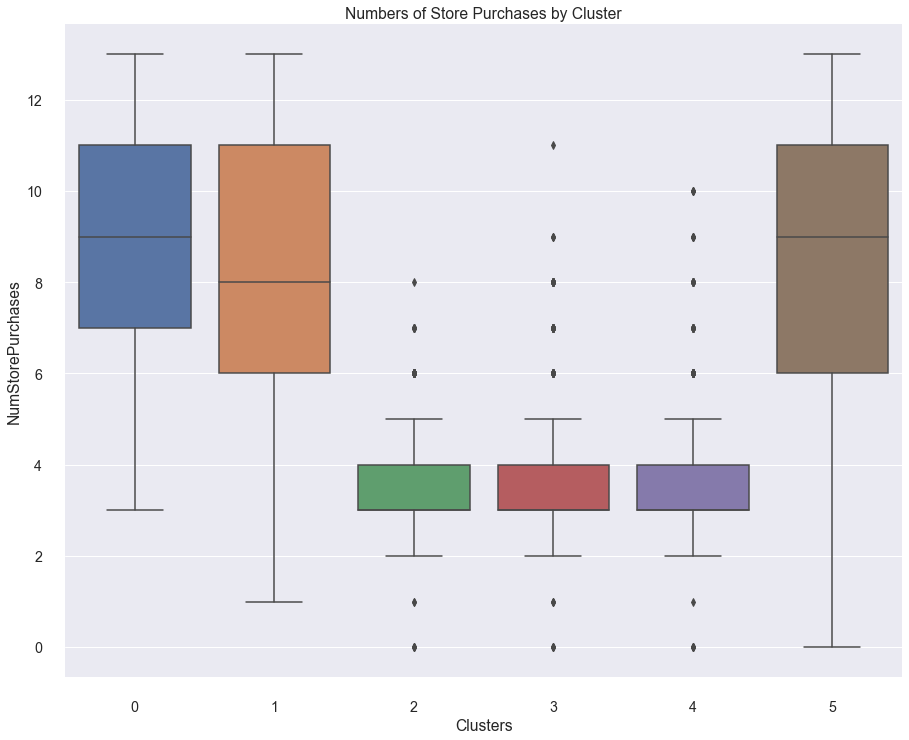

In [118]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumStorePurchases",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Purchases by Cluster")

plt.savefig('./figures/num_store.png')

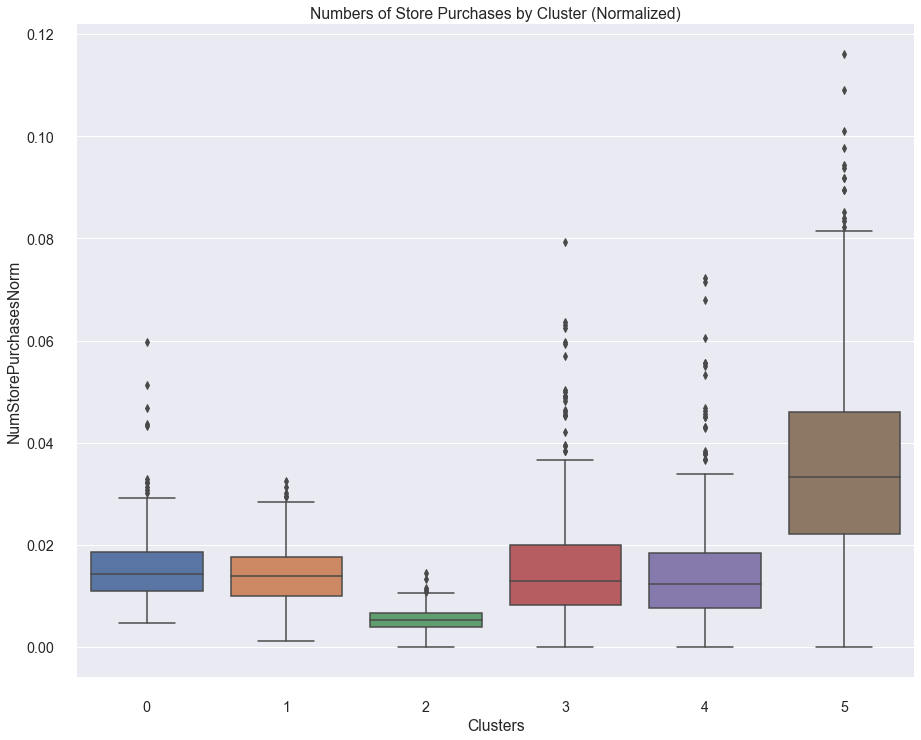

In [117]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumStorePurchasesNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Purchases by Cluster (Normalized)")

plt.savefig('./figures/num_store_norm.png')

In [62]:
# When normalized, Cluster 1 makes the most web, catalog and in-store puchases.  
# Cluster 3 relatively prone to catalog purchases
# Cluster 5 relatively prone to web purchases

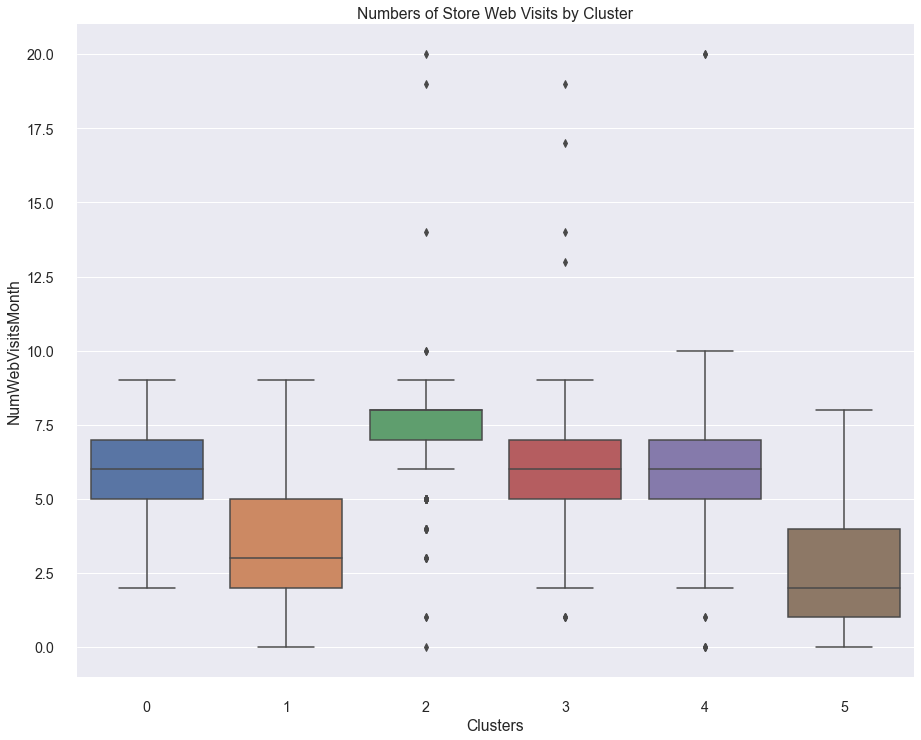

In [120]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumWebVisitsMonth",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Web Visits by Cluster")

plt.savefig('./figures/num_web_visits.png')

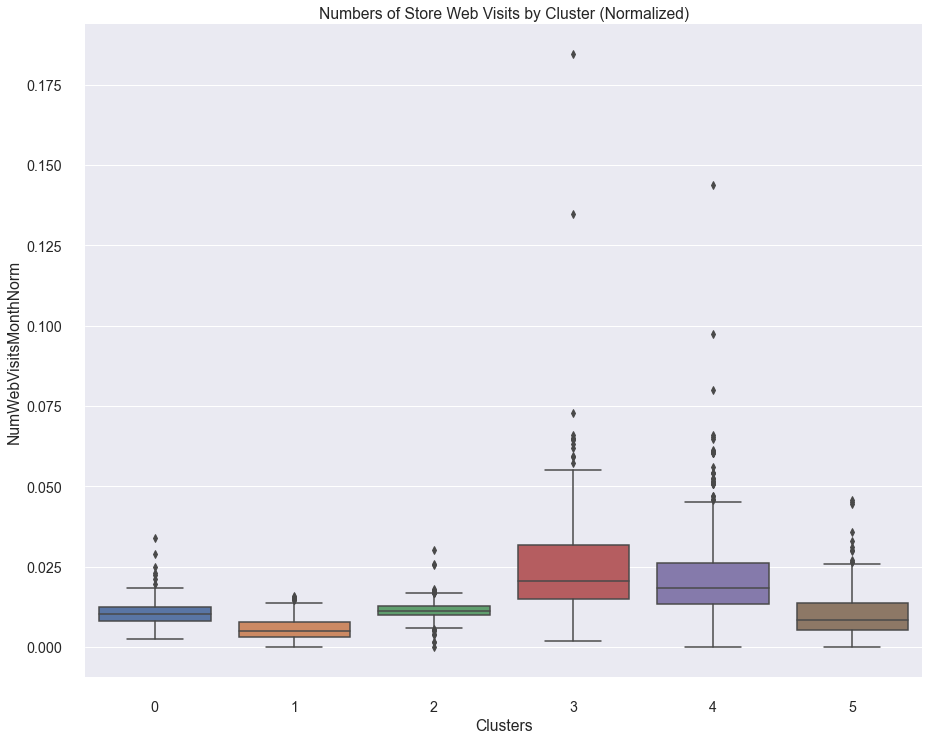

In [121]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumWebVisitsMonthNorm",
            data=df)
sns.despine(offset=10, trim=True)

plt.title("Numbers of Store Web Visits by Cluster (Normalized)")

plt.savefig('./figures/num_web_visits_norm.png')

In [65]:
# Cluster 2 visit the web the most.  Cluster 4 is also active on the web.  Target a campaign for them there by giving them targeted deals!

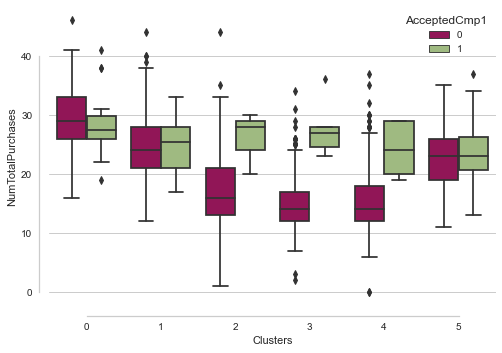

In [140]:
sns.boxplot(x="Clusters", y="NumTotalPurchases",
            hue="AcceptedCmp1", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [66]:
### Although 1 spend less than 3 total, their spending normalized by length as customers is much higher!
### Focus on attracting this recent revenue-bringing group

<AxesSubplot:xlabel='Clusters', ylabel='MntSpentNorm'>

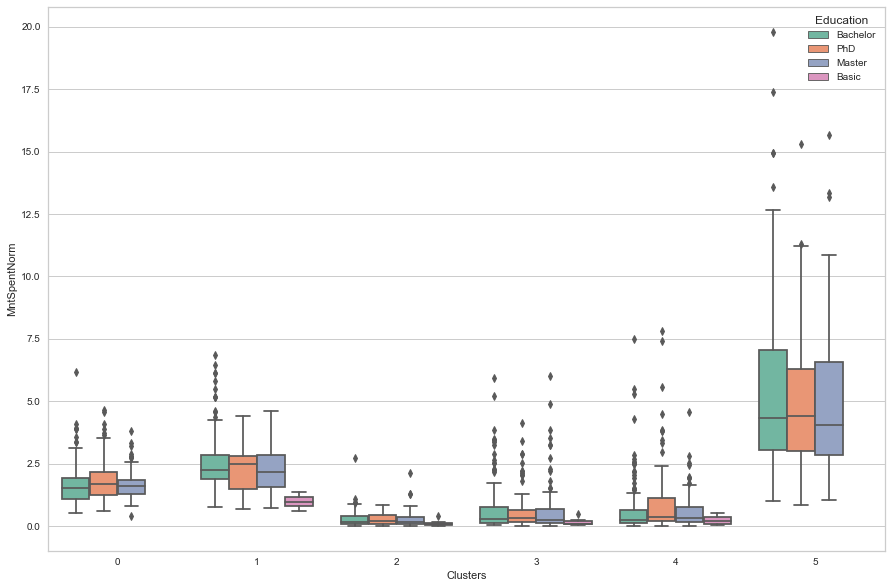

In [141]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Clusters", y="MntSpentNorm",
            hue="Education", palette=palette,
            data=df)
#sns.despine(offset=10, trim=True)

### Overall, higher-educated customers spend more

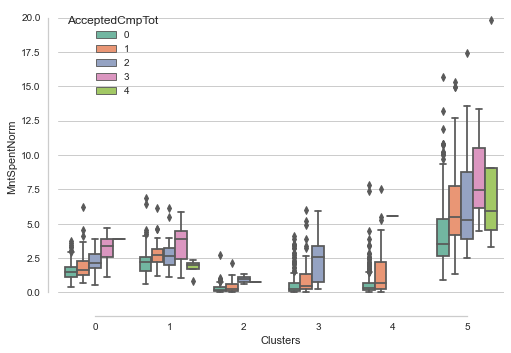

In [142]:
sns.boxplot(x="Clusters", y="MntSpentNorm",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

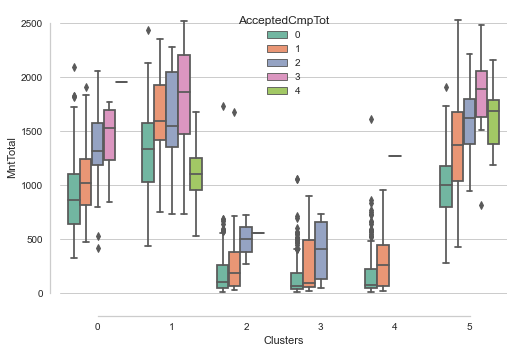

In [143]:
sns.boxplot(x="Clusters", y="MntTotal",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

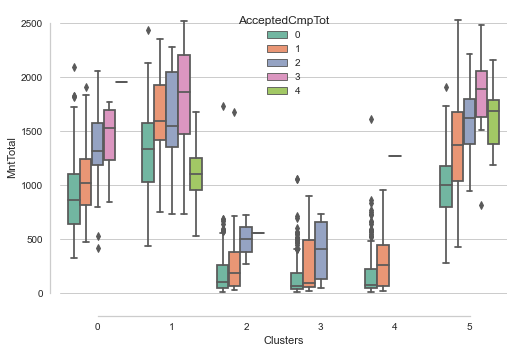

In [144]:
sns.boxplot(x="Clusters", y="MntTotal",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

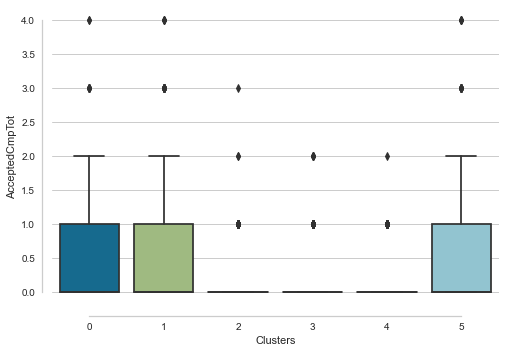

In [77]:
sns.boxplot(x="Clusters", y="AcceptedCmpTot",
            #hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

### What about the amounts spent on other goods when normalized?

In [146]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'Solitary', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm', 'Clusters', 'MntWinesNorm', 'MntFruitsNorm',
       'MntMeatProductsNorm', 'MntFishProductsNorm', 'MntSweetProductsNorm',
       'MntGoldProdsNorm', 'NumDealsPurchasesNorm', 'NumWebPurchasesNorm',
       'NumStorePurchasesNorm', 'NumWebVisitsMonthNorm',
       'NumCatalogPurchasesNorm'],
      dtype='object')

In [147]:
# df['AcceptedCmpTotNorm']=df['AcceptedCmpTot']/df['Len_Customer'] Don't do that!


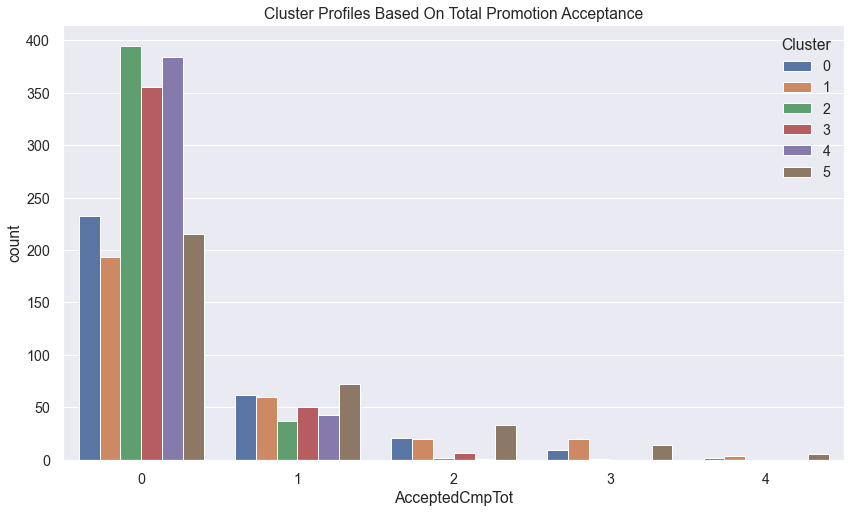

In [139]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmpTot"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Total Promotion Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/num_total_acceptance.png')

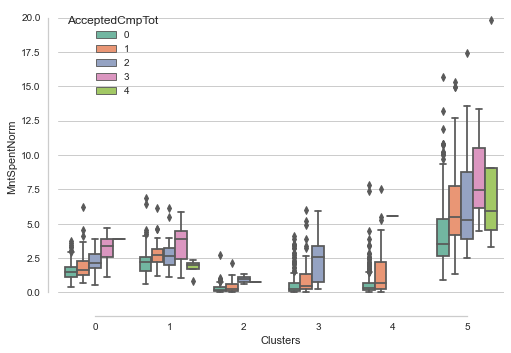

In [150]:
sns.boxplot(x="Clusters", y="MntSpentNorm",
            hue="AcceptedCmpTot", palette=palette,
            data=df)
sns.despine(offset=10, trim=True)
## Cluster 2 spend a lot and accept many promotions

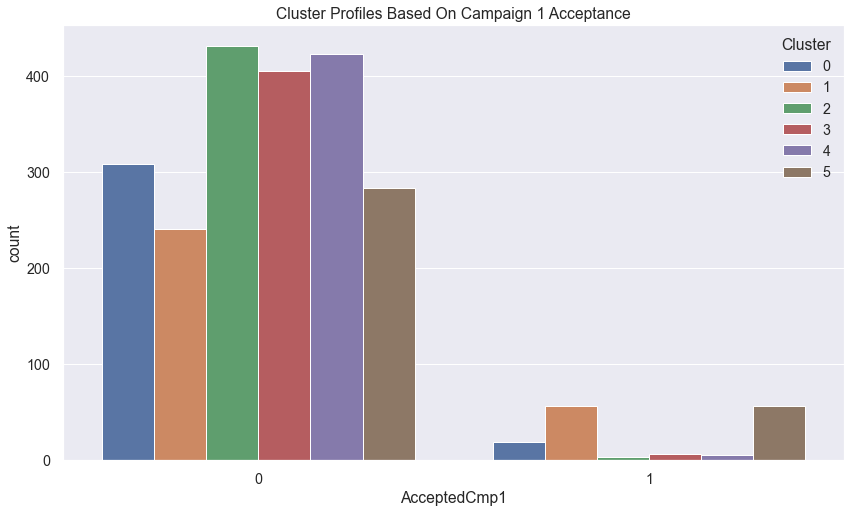

In [140]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp1"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 1 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp1_acceptance.png')

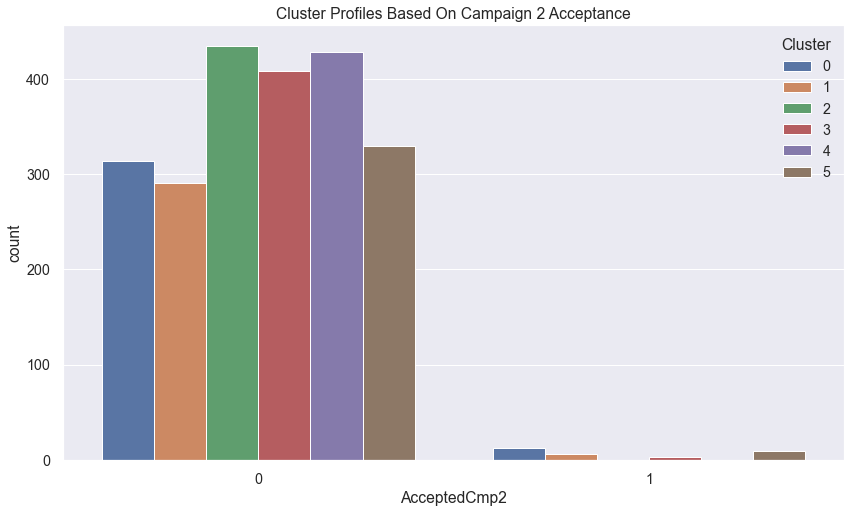

In [141]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp2"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 2 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp2_acceptance.png')

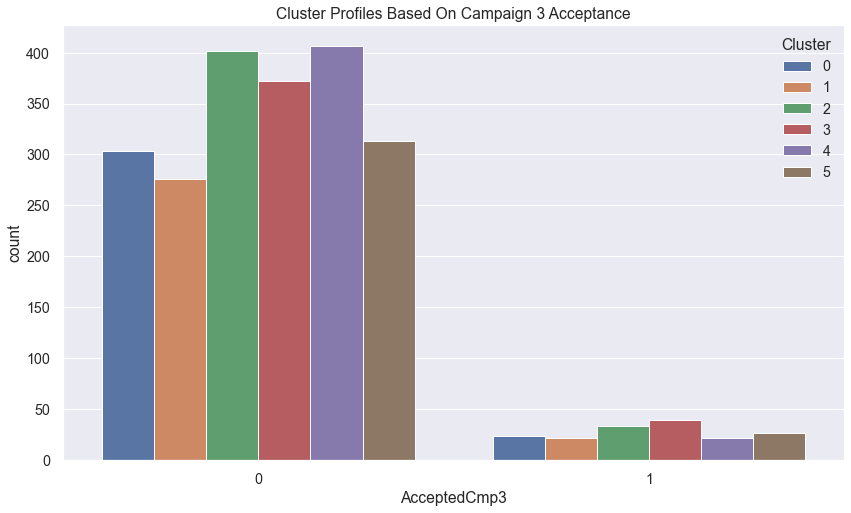

In [142]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp3"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 3 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp3_acceptance.png')

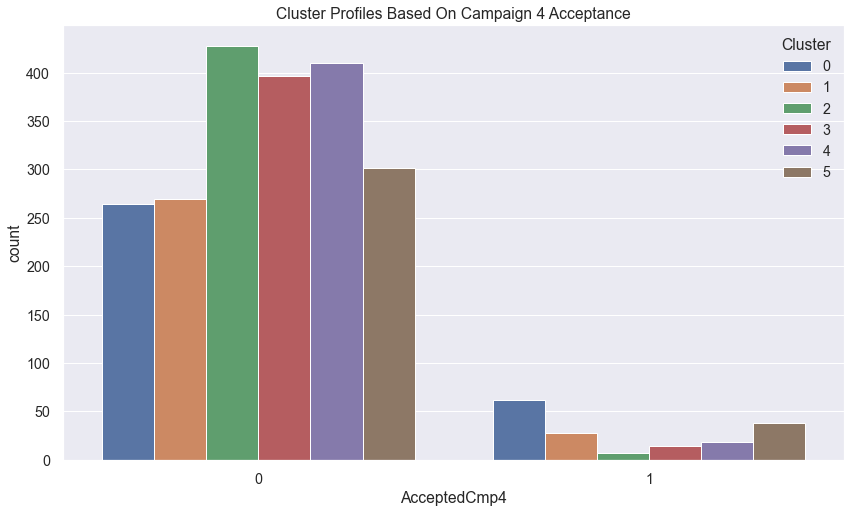

In [143]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp4"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 4 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp4_acceptance.png')

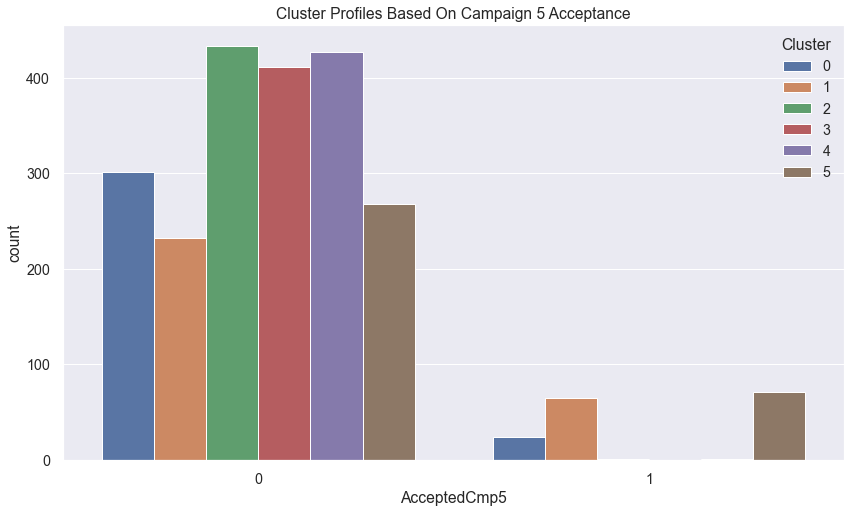

In [144]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["AcceptedCmp5"],hue=df["Clusters"])

plt.title("Cluster Profiles Based On Campaign 5 Acceptance")
plt.legend(title='Cluster',loc=1)
plt.savefig('./figures/cmp5_acceptance.png')

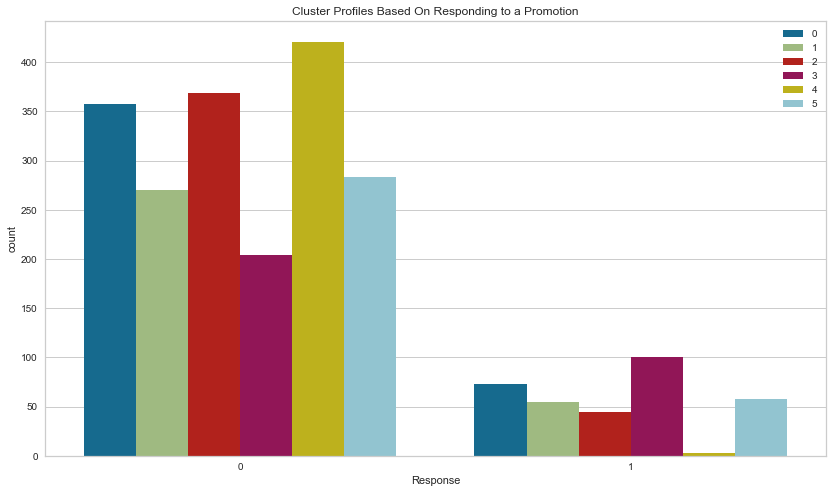

In [71]:
plt.figure(figsize=(14, 8))
#palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.countplot(x=df["Response"],hue=df["Clusters"])

plot.set_title("Cluster Profiles Based On Responding to a Promotion")
plt.legend()
plt.show()

### Not sure if 'Response' is particularly meaningful

## Analysis before dropping the age outliers

### Cluster 4 is the most responsive to promotions.  Who are these customers?
- Upper middle class
- College educated or above, with a heavy represenation of people with PhDs
- Mostly married or living together
- Are less likely to have children than average, and have fewer children
- Story: Highly educated professors and professionals -> The "Strivers"
- We don't know much about these promotions, but perhaps they are for wines, meats, and more expensive items

### Cluster 1 are the repeated deal hunters.  Who are they?
- Higher than average income (.5 standard dev)
- Highly educated (lots of PhDs)
- Overwhelmingly have children
- The 'Familied Philosophers'

In [ ]:
<!-- # Description of Customer Characteristics
- Cluster 0: Lowest median income of all clusters (1 std to the left). The biggest cluster.
- Cluster 1: High median income (1 std to the right)
- Cluster 2: Lower than average median income (1 std to the left)
- Cluster 3: Lower than average median income (.5 std to the left)
- Cluster 4: Lower than average median income (.5 std to the left)
- Cluster 5: Highish median income (.5 std to the right)
- All clusters similar in age, with Cluster 0 slightly younger  -->

#### Recommend A/B testing on clusters